In [24]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd', context='paper', spines=True, 
             ticks=True, grid=True, gridlines='dotted', figsize=(6,4.5))

In [53]:
# bigcon 01 
import pandas as pd
train_label=pd.read_csv("data/bigCon/bigcon_data/train_label.csv")
train_label.info()
print('*'*50)
train_activity=pd.read_csv("data/bigCon/bigcon_data/train_activity.csv")
train_activity.info()
print('*'*50)
train_trade=pd.read_csv("data/bigCon/bigcon_data/train_trade.csv")
train_trade.info()
print('*'*50)
train_pledge=pd.read_csv("data/bigCon/bigcon_data/train_pledge.csv")
train_pledge.info()
print('*'*50)
train_combat=pd.read_csv("data/bigCon/bigcon_data/train_combat.csv")
train_combat.info()
print('*'*50)
train_payment=pd.read_csv("data/bigCon/bigcon_data/train_payment.csv")
train_payment.info()
print('*'*50)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
acc_id           40000 non-null int64
survival_time    40000 non-null int64
amount_spent     40000 non-null float64
dtypes: float64(1), int64(2)
memory usage: 937.6 KB
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594673 entries, 0 to 1594672
Data columns (total 17 columns):
day                  1594673 non-null int64
acc_id               1594673 non-null int64
char_id              1594673 non-null int64
server               1594673 non-null object
playtime             1594673 non-null float64
npc_kill             1594673 non-null float64
solo_exp             1594673 non-null float64
party_exp            1594673 non-null float64
quest_exp            1594673 non-null float64
boss_monster         1594673 non-null int64
death                1594673 non-null float64
revive               1594673 non-null float64
exp_recovery     

In [55]:
# 회귀 선형적 접근.. 양 예측 문제 
display(train_label.shape)
display(train_activity.shape)
display(train_trade.shape)
display(train_pledge.shape)
display(train_combat.shape)
display(train_payment.shape)

(40000, 3)

(1594673, 17)

(2245196, 11)

(1083384, 15)

(1574671, 13)

(66432, 3)

In [27]:
temp=train_label.head()
type(train_label)


pandas.core.frame.DataFrame

In [28]:
# train_label.temp # df 객체는 temp 속성 안가져 

In [29]:
train_label.isnull().sum() # label => null값 x

acc_id           0
survival_time    0
amount_spent     0
dtype: int64

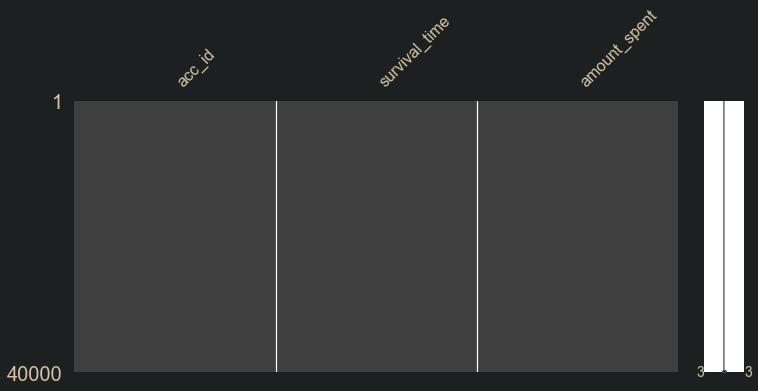

In [30]:
import missingno as msno
msno.matrix(train_label, figsize=(12,5)) # 결측치 유무 확인 함수 

In [31]:
train_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
acc_id           40000 non-null int64
survival_time    40000 non-null int64
amount_spent     40000 non-null float64
dtypes: float64(1), int64(2)
memory usage: 937.6 KB


In [45]:
train_label.acc_id # user id => 수치형 데이터 형태 
label_ST=train_label.survival_time
# label_ST

In [33]:
# plt.title("Plot")
# plt.plot(['survival_time'])
# plt.show()

(array([ 1495.,  1431.,   269.,   526.,  1219.,   805.,   507.,   230.,
          585.,   348.,   706.,   273.,   634.,   935.,   215.,   390.,
          248.,  1743.,   159.,   403.,   325.,   179.,   705.,   120.,
          404.,   122.,   243.,   272.,   189.,   230.,   114.,   337.,
          126.,   231.,   250.,   208.,   344.,   145.,   247., 22088.]),
 array([ 1.   ,  2.575,  4.15 ,  5.725,  7.3  ,  8.875, 10.45 , 12.025,
        13.6  , 15.175, 16.75 , 18.325, 19.9  , 21.475, 23.05 , 24.625,
        26.2  , 27.775, 29.35 , 30.925, 32.5  , 34.075, 35.65 , 37.225,
        38.8  , 40.375, 41.95 , 43.525, 45.1  , 46.675, 48.25 , 49.825,
        51.4  , 52.975, 54.55 , 56.125, 57.7  , 59.275, 60.85 , 62.425,
        64.   ]),
 <a list of 40 Patch objects>)

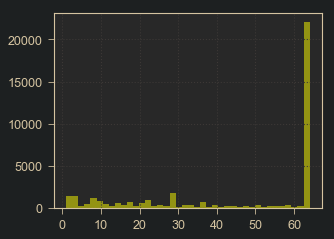

In [34]:
plt.hist(train_label['survival_time'], bins=40, density=False, 
         facecolor='yellow', alpha=0.5) #투명도

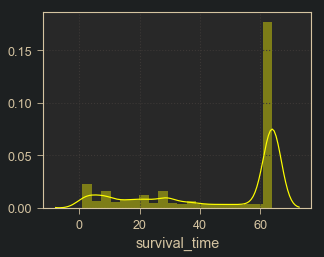

In [35]:
sns.distplot(train_label['survival_time'], color='yellow', kde=True, bins=20)
# 정규분포와 비교 
# train_label.plot() 
# dist / y / 밀도 
# 히스토와 같고 선의 밀집 정도 확인가능 


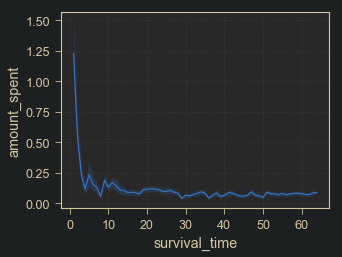

In [43]:
# sns.plot(x='SurviveTime', data=label_ST)
sns.lineplot(x='survival_time',y='amount_spent',data=train_label)
# 돈을 많이 쓸수론 생존기간이 짧다 

In [37]:
# plt.plot(train_label['survival_time'],data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUQAAAEBCAYAAAAAf9wZAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJztnXl8VNXd/9939iUzWYFsLLKoQFgEFwRRKQ8VLRb35XHfoGqlPtU+j9oWffr8aq2ltY+2WpTHqrVqXVq1IooLVIGIuLELaNiTAEnIPvvc3x93ZjITss4ks+Sc9+uVV765c+bO+XzvzWfOuffcc5ShI45TkUgkEgm6VFdAIpFI0gVpiBKJRBJCGqJEIpGEkIYokUgkIaQhSiQSSQhpiBKJRBJCGqJEIpGEkIYokUgkIaQhSiQSSQhpiBKJRBLCkOoK9IaCPCetLk+qqyGRSDIAm9VMTV1jr96TMYZYkOfk+Ud/nOpqSCSSDOLqRb/rlSlmjCGGW4YLfvIHXG5vimsjkUjSGavFxJO/+WGve5QZY4hhXG5v2nSbbRYzre70qEuyEE2z1CsW8qZKAiiKkuoqJB3RNEu9YiENMQFaXO5UVyHpiKZZ6hULaYgJYLeaU12FpCOaZqlXLKQhJoAq4FzjommWesVCGmICiHjxWTTNUq9YSENMgCyrJdVVSDqiaZZ6xUIaYgIEBexfiKZZ6hWLjBuHmE6I2L0QTbPIei+9tL7b8q+8ktOf1Uk6soWYAFk28boXommWesVCGmICBALBVFch6YimWeoVC2mICeDyiPdMtWiapV6xkIaYAA6bNdVVSDqiaZZ6xUIaYgL4A4FUVyHpiKZZ6hULaYgJIGL3QjTNUq9YSENMAKddvO6FaJqlXrGQhpgAXp8/1VVIOqJplnrFQhpiAri9vlRXIemIplnqFQtpiAngtNtSXYWkI5pmqVcspCEmgMcn3repaJqlXrGQhpgAHgG7F6JplnrFQhpiAmRnide9EE2z1CsW0hATwC3gmC3RNEu9YiENMQE8Ag5REE2z1CsW0hATIDvLnuoqJB3RNEu9YiENMQFcHrEmDwXxNEu9YiENMQFEHNUvmmapVyykIcaJAuQ47CiprkgSEU2z1Cse0hDjRAVaXB5EWpJHNM1Sr3hIQ0wAn1+87oVomqVesZCGGCcKkOvIEqp7IZpmqVc8pCHGiQo0u1xCdS9E0yz1ioc0xATw+cWbbl00zVKvWPRoofoTRpVwxw3zKC3Mp2LfIZYs/QeVh+o6LGsyGljy8xv4898+4MutFZHtf/rVbRQOyol8+2zctpsHfvdiwgJShQLkOLOob2wW5htVNM1Sr3h0a4hGo4HFd17BUy+sZM2n27js/DO4a+EF3PWLp48pO7S4gB/fMp/jR5Ycs4+Sonwuv/VhWl0DY+CnCjS1iNW9EE2z1Cse3XaZJ40dQUurm9Xlm/EHArz0xkeMKB3M0OKCmHJZditLfn4jqz/ZwqGa+pjXRpQOpqauMWPNUOkkDkStUNZZmXSI+5JkrMqWDjkLx/5AIKX5TgadndN+v0Iw2EHsU1DVY9+bDnGidGuIQ4sL2F9VE/k7qKpUH6lnWPGgmHJut5eb7n6MN95dT/uvmFHDC1FVlf/971t46Y8/4ec/upy8HEenn3nurKk8+osFMT8P33c9AHaLGQCbxYzdatG2Wc2R7XarBVsozrJZsJpNgLbebCS2W7GYtNhpt2E2GQFt6iOzMRzbMRm1BnS2w47JoMU5DjtGgx4FyMt2YNTrAch1ZmHQa+nMzXag12lxXrYDnU47ZPk5TnRKW6woCoqikJ/jBEAXHesU8rK1HOl1OnJDsUGvI9eZFYr15IRio0FPjkN7DtVkMJAdjo2GyPOpZqMxMr2T2WSMzI5sMZlwhBYXsppNkbV5rWYTWTZLJN9ZVgt5zizsFjN2awf5jopj8m2zYjG35dsSyrfTHp1vW4f5zg7lG7TunKFH+dZ1ke9Q3E2+87Id2jF2ZnWR73DcWb4NneTbGFnMqbt8h+Pu8p3Vab6tsfk2dZDv0LkePqfDud/wSREN9dr+168toqlR22f5mhKam42RfOuj861rl2/a8q20y3c4DucbQK/XkesMn+u9y7cpKt9hbb1FGTriuC5byFfOP5NhJYP49eOvRbb9bvFNvPXBBj5cu6nD9zz7yJ38ftmbkWuIc8+ewuTxI1n24kpaWt384Oq5lBTlc/f//LnHFbVZzfz9qXu55o7fJb2lqdDm8dGxXq8jEAh2WSYd4r4kWnN/kQ45C8d6vY5gIJiyfCeDzs7pCy9sQKdT0em0FmIk9inoDSqKAq++kpM2xyoam9XMXx77MRfd8qte+UW3LUSP14fJFOu2ZrMRl7vn86a9s/oLHvrjq9TUNeJye1n20nuUnTCcrAxZ8lDtJI42hs7KpEPcl/S3GUJ65CwcB6LMsKfvzTQ6O6cNBs0Aj4mNmhm2f286xInSrSHur6yhtDC/7Q2KQuHgXPZX1nTxrljOOeskJo07LvK30WAgGFQzelS8AuSHulWiIJpmqVc8ujXEjdt248iyMWfmZAx6PVfMP5PK6loOVPXcEHOys1h41Tnk5TiwWkwsuOoc1n22HY8nc9dvUIH6ppaMbhn0FtE0S73i0e2VR6/Pz+Ilf2XRjfO49dpzqdhXzYOPvQLA0odu46U3P2bVus1d7uOVt9aS47Tzx18uxGQ0sGHjN/x+2Zt9oyCFBIL9331MN0TTLPWKRY9uxXyzp4pFi586ZvvCex7vsPx1//H7mL+DwSBLn3+Hpc+/E0cV05PwHbm6hiZhvlFF0yz1iod8dC9OVOBok1gj+kXTLPWKhzTEBAgGxTt1RNMs9YqFNMQ4UYCC0IBTURBNs9QrHtIQ40QF4a61iKZZ6hUPaYgJoKrinTqiaZZ6xUIaYpxEP6MpCqJplnrFQxpinKhAbUOjUN0L0TRLveIhDTEhRPwuFU2z1CsS0hDjRMTnPkXTLPWKR3yThklQgZr6xlRXI6mIplnqFQ/ZQkyA8OSjIiGaZqlXLKQhxkn4uU+RTh/RNEu94iG7zHEiYvdCNM1Sr3jIFmIChNfuEAnRNEu9YiG2+gRQgFyHXajuhWiapV7xkF3mONEGsTaluhpJRTTNUq94yBZiAugF7F6IplnqFQux1SeAgrZmsEjdC9E0S73iIbvMcRKeKkkkRNMs9YqHbCEmgEEvXvpE0yz1ioXY6hNAAZx2m1DdC9E0S73iIbvMcaICdY3Nqa5GUhFNs9QrHrKFmAAGvT7VVUg6ommWesVCGmKcKIDDbhWqeyGaZqlXPGSXOU5U4Khg3QvRNEu94iFbiAlgNIjXvRBNs9QrFtIQ40QB7FaLUN0L0TRLveIhu8xxogL1TS2prkZSEU2z1CsesoWYACaDeN8nommWesVCGmKcKIDNahaqeyGaZqlXPMT+OkgAEbsXommWesVDthATwGQU7/tENM1Sr1hIQ0wAq9mU6iokHdE0S71iIQ0xARqaW1NdhaQjmmapVyykISaA2WhMdRWSjmiapV6xkIaYAGaTeCePaJqlXrGQhpgAjS3idS9E0yz1ioU0xASwCPhtKppmqVcspCEmgEnA6y2iaZZ6xUIaYgKI2L0QTbPUKxbSEBPAIuCYLdE0S71iIQ0xAYwCTrcummapVyx69JzOCaNKuOOGeZQW5lOx7xBLlv6DykN1HZY1GQ0s+fkN/PlvH/Dl1orI9svOP4ML507DaDDwwZqN/On5d1BVtW9UpIimVleqq5B0RNMs9YpFty1Eo9HA4juv4NXl67hk4a/5bNM33LXwgg7LDi0u4Nf3XcfxI0titk+bcgJzz57CosVPcfNPHmPsmKGcc9ZJfaMghYj4mJNomqVesejWECeNHUFLq5vV5ZvxBwK89MZHjCgdzNDigphyWXYrS35+I6s/2cKhmvqY12ZNn8CKVZ9zpLaB+sYWXnlrDXPPntK3SlKAiCuUiaZZ6hWLbg1xaHEB+6tqIn8HVZXqI/UMKx4UU87t9nLT3Y/xxrvrtXmEovdRVMD+yrZ9HKyuY2hJ7PvTGaWTuDmqe9FZmXSI+5JkdKnSIWfhuKnVldJ8J4POzmm/XyEY7CD2KYSvdqX6+LSPE6VbQ7SYTXi9/phtHo8Pszl2vJI/EKC5peN/Fosldh8er6/LAaDnzprKo79YEPPz8H3XA2C3mAGwWczYrRZtm9Uc2W63WrCF4iybJdIFcNisbbHdisWkxU67LfK4UnaWLfIsZ3aWPTIVUrbDHplJOMdhjyzEk5vtiHyj5jqzMOh1ke16nRbnZTvQ6bRDlp/jRKe0xYqioCgK+TlOAHTRsU4hL9sBgF6nIzcUG/Q6cp1ZoVhPTig2GvTkOOyANutxdjg2GsjO0mKz0Uh2lk2LTUacdi22mEw47FZA6zI5bG1xls0Sk2+bRcu13dpBvqPimHzbrJG7l067LXLsnfbofNs6zHd2VL5znFk9zLeui3yH4m7yHY7tVksX+Q7HneXb0Em+jTh7kO8sa3Tuu853Vqf5tsbm29RBvqPO9VxnFsZQ7jd8UkRDvbb/9WuLaGrU9lm+poTmZmMk3/rofOva5Zu2fCvt8h2Oo/Ot1+vIdYbP9d7l2xSV73inMev2XR6vD5MptpjZbMTl9vb4Qzye2H2YTV2/f8Wqz1mx6vOYbTarmb8/dS8tbg8AraHfAC2u6NgdiZtb2+Lolk1TlHFHj7uKnumjobltosyGppZIo7c+KvZ6ffgDAUBbvjG8/WhDUySui4pr6xs7jUFrfUfioEpdQxMAgWCQo6HYHwhGlor0BwLUh2KfPxCZ3NPr9+Nr0r6AvD4/Xp8We3w+PD6fFnt9eLxa7PZ6CR8Ol6ftuETH4XxnWS00R+U4Jt+uTvLd2nG+O819VI5jch+d4wTzrQJqF/kOxwp0ke9w7Kehw3z78YTjmHz7cIfi7vLdPu4s382d5rtn53rknPb58fm1Op8yrQqdTnvltBlt8elnHERv0OLe5Jt2+Q7H0fkOBIIcbQyf6z3Lt893bO7Dv3tLty3E/ZU1lBbmt71BUSgcnBvTBe52H1U1lBa17aOkKD+mG57uqJ3E0SdkZ2XSIe5LojX3F+mQs3Dc7HKnNN/JoLNz2mBQCTX+YmOjSqjhnfLj0z5OlG4NceO23TiybMyZORmDXs8V88+ksrqWA70wtNXlm5k3+xSKBueS7bRz6fdmsHrd5oQqng6EuysiIZpmqVcsuu0ye31+Fi/5K4tunMet155Lxb5qHnzsFQCWPnQbL735Mau6Mbd1n31N8ZB8Hv7p9ZhNRt5fs5E33/u0bxSkEEXJ5Evp8SGaZqlXLHp05fGbPVUsWvzUMdsX3vN4h+Wv+4/fH7Pt1eVreXX52l5WL71pSUL3Md0QTbPUKxby0b0ECN/5EwnRNEu9YiENMREy+Up6vIimWeoVCmmICdASNRxCFETTLPWKhTTEBAgPDBcJ0TRLvWIhDTEBMn22nngQTbPUKxbSEBOgVcDuhWiapV6xkIaYAOHnTkVCNM1Sr1hIQ0yAQCCY6iokHdE0S71iIQ0xAaIfxhcF0TRLvWIhDTEBwtM2iYRomqVesZCGmADhqb9EQjTNUq9YSENMABG7F6JplnrFQhpiAoRnmRYJ0TRLvWIhDTEBfD7xuheiaZZ6xUIaYgK4veJ1L0TTLPWKhTTEBAgvGiQSommWesVCGmIChBdsEgnRNEu9YiENMQHCq6iJhGiapV6xkIaYAOE1YEVCNM1Sr1hIQ0wAt0e8b1PRNEu9nZOX52fevAYG0jTb8S1vLwHEvN4immapt2NGj/Zw6aX1mEwqI0d6efTRAiDzV+yTLcQEyM6yp7oKSUc0zVLvsQwb5uWqq46yZo2d668fxrXX1rFgQW0Satf/SENMAJdHvMk0RdMs9R7Laae1smWLhY8/zuKzz2zcd18RCxbUYbVm/tRh0hATwOvzp7oKSUc0zVJvLDZbkLFj3Xz2WdvNlw8+cNDaqjBnTlN/V6/fkYYYJwqQ47APgKsmPUc0zVLvsZx0koujR/Xs3WuMbAsEFN56y8n8+Q39Xsf+RhpinKhAq8szgO6vdY9omqXeY0tMndoaah3G2ubrr2czbVorhYWZfRNKGmICeP1idadAPM1SbxulpT5ycwN89dWxM+Ls3Glhxw4z55/f2J/V63ekIcaJAuQK1J0C8TRLvbGMHOnlwAEjLlfHtvH2205mz87s64jSEONEBZpdbmG6UyCeZqk3lpEjvVRUmDp9/6ef2hg/3o3NlrlTiElDTACfP3MPfLyIplnq1TAYVIYO9VJRYe70vdu2WfB4dJx0kqu/qtfvSEOMEwXIdWYJ050C8TRLvW0MHepFVeHAAWMHr2r4/QpffGHllFOkIQqHCjS1uITpToF4mqXeNkaO9LJvn4lAoOuvhw0bbJxySmu/1C8ZSENMABFXKBNNs9SrcdxxXV8/DLNhg5WyMhcWS2Y+tSINMU4UIE+g7hSIp1nq1TCZgpSU+Ni9u3tD3LrVSiCgMHlyZnabpSHGiQo0trQK050C8TRLvRrFxX6CQaiq6vz6YRifT+Grr6wZ222WhpgA/kBmdgsSQTTNUi8UF/uoqjISDPasrfzFF1YmTnT3ddWSgjTEOFGAvGyHMN0pEE+z1KtRUuKjsrL71mGYLVssjB/vJhMnjpWGGCcq0NDUkoGHPH5E0yz1ahQX+zh4sOeGuHWrhdzcAMXFmfdcszTEBAgExepOgXiaRddrsQTJzw/0yhCPHDFy+LCBsrLM6zZLQ4wTBcgXqDsF4mmWerXWocejUFur79W+tmyxSEMUCRU42tQsTHcKxNMs9WrXD6uqDKhq774Wtm6VhigcwaAo/yptiKZZdL29vX4YJlNvrEhDjBMFKMhxCtOdAvE0S729v8McZutWC05nkGHDMuvGSo+WIT1hVAl33DCP0sJ8KvYdYsnSf1B5qC6mjKIoLLjqHGbPmEhQVXn9nU946c2PI6+/9tS96JS2VL/30Vc8/tzbfSQj+ahAXUNThn3/JYZomkXXa7cHyMkJxtVCrK01UFVlYPx4N/v2df+ES7rQrSEajQYW33kFT72wkjWfbuOy88/groUXcNcvno4p9/3vnsqJo0u56SePkWW38qv/uoYdFQf5cksFRUPyCPgDXHzrw/0mJBUEVVH+VdoQTbPIeouL/bhcCnV1vbuhEmbrVq3bvGKFs6+q1+9022WeNHYELa1uVpdvxh8I8NIbHzGidDBDiwtiys06fQL/WFFOU7OLqkN1vPXBBuaePQWAUcMKqdh3qH8UJAGlg7h996KjMukS9xXJ6kKmQ84U2vTqelg+U+nsnC4sDHeXFfx+hfCIHL9PIeybXeVj+3YL48a5M+pc79YQhxYXsL+qJvJ3UFWpPlLPsOJBXZY7WF0XKTNqeCHOLCtP/OpWXvjD3fzHLfOxWTufaPLcWVN59BcLYn4evu96AOwW7X02ixm71aJts5oj2+1WC7ZQnGWzYDVrzXWHzdoW261YTFrstNswm7QuQXaWDbMxHNsxGbUGdLbDjsmgxTkOO0aDHhVtzJZer3175jqzMOi1dOZmO9DrtDgv24FOpx2y/Bxn5LJBfo4TRVFQFIX8HO0bVBcd6xTysh0A6HU6ckOxQa8j15kVivXkhGKjQU+OQ1tk3GQwkB2OjYbI4uNmo5HsLG35SLPJiNOuxRaTCYddWyfDajbhsLXFWTZLJN82q4XahqZQ7jvId1Qck2+bFYu5Ld+WUL6d9uh82zrMd3Yo3wA5ziwMPcq3rot8h+Ju8p2X7UAF6ptaIjk+Nt/huLN8GzrJtxFnD/KdZW2Lu8t3Vqf5tsbm29RBvkPnuoo2240hlHu7TU/Ft1od1q8toqlR22f5mhKam42RfOuj8x11rm/fbmHsWDf5OdpQHqVdvsNxON8Aer2OXGf4XO9dvk1R+Q5r6y3dvstiNuH1xi484/H4MJuNXZaLLuPz+9m2az9/eW0Vqgp3/+ACbr/uPH7zp390+JkrVn3OilWfx2yzWc38/al7aXFrC2m3utsW1G5xRcdtt/qbW9vipta22TeaWtrixpa2h9AbmqPjlrY4avR+fVTc0NQS6WIcbWwbrnA06jpM9DWZ2vrGTmPQvmwicVClrkFbnyIQDHI0FPsDQY42NofiAPWh2OcPUN+k1dnr9+Nr0o6F1+ePrLXr8fnw+LSL3B6vD49Xi91eL26vVheXxxvRHR2H860oSuQYQLt8uzrJd2vH+e409+1yHMl9dI4TzLcKqF3kOyb3neY7HPtp6DDffjzhOCbfPtyhuLt8t487y3dzp/nu2bmuRm1XQ+f0+LIm3n5bM63TZlSh02nbTz/jIHqDFneV723bzOTkBDFZ61DrjdAu3+E4Jt+BIEcbw+d6z/Lt8x2b+3jX0+62hejx+jCZYn3TbDbicntjtrnblYsu88LrH/GHZ5bT0NRKY3Mrz726imlTToirwqlA7SBu/9xnR2XSJe4rkjVQOR1yptKmt7d1yzSiz+nw8R00yEd2dpCqKu1/2mBQCTUEMRhVwvdHu8rHoUMG6ur0nDjW3WmZvo4TpVtD3F9ZQ2lhftsbFIXCwbnsr6yJKXegXbmSwvxImUu+N4ORwwojrxmNBny+zJ54UwVqor4RRUA0zSLrLStz09KiUF8f3w0VDYXt282MHZs5A7S7NcSN23bjyLIxZ+ZkDHo9V8w/k8rqWg5UxRri6vLNXDpvBtlOO0WDc5k3+2RWl28GoHhIHjdfOQe7zUK2w8YNl83mg7Ub+0dREokeRiQKomkWVW9ZmTtyQyURtOuInu4LpgndGqLX52fxkr9y/pxTePlP/8mUCSN58LFXAFj60G3Mmj4BgDdWfsqm7Xt54sFb+d39N7H8w8/45IsdACx7cSV19c08/dtFLPvNHew9eIRnXv6gH2X1P6JNDQXiaRZZb1mZO67xh+0J31jJFHp0K+abPVUsWvzUMdsX3vN4JA4Ggyx7cSXLXlx5TLlWl4clSzu+gZKphLsXIiGaZnH1qowf7+bddx3dvaVbtm0zU1zsJyfHT319fHd+k4l8dC8BwkMMREI0zSLqLSry93rKr87Yu9dES4uOceMyo9ssDTFOFCDXIc4CRCCeZlH1lpW5OXJET1NT4vagqgpff505N1bSvw2bpqhAbWjslCiIpllUvWVlLrZssdBXz4Bk0p1m2UJMgPAIfZEQTbOIesvK3GzZYu2zfWbSnWaxjnYfoqA9ViZKdwrE0yymXhvjx7tDLcS+Yft2CyNGeLHZ0n85BmmIcSLa1FAgnmYR9dqddWRnB9m6te8M8ZtvzPj9cPzx6d9tloaYAOHJBURCNM2i6Z040UNlpYHa2r67veDzKXzzjTkj7jSLdbT7EAVt9hBRulMgnmYR9U6Z7O/T1mGYTBmgLQ0xTlSgrlGcBYhAPM0i6h19fGOfXj8Mkyl3mqUhJkB4bj6REE2zSHr1epWyMk+f3mEOs327hTFjvBgM6f31Ig0xThS0iWZF6U6BeJpF03vC8R7M5iCbNvZ9C/Hrr80YDCqjRqX3dURpiHGiEjtJqQiIplk0vZMmu9i500xzS9+3iltb9ezdawotTZq+SENMgPDU9iIhmmaR9E6e7GLTRlu/7X/zZgsTJkhDHJAoaGtaiNKdAvE0i6b3pJNc7Nie3W96N260MmmSq/uCKUQaYpyowNGo9T5EQDTNIukdNMjP0KE+1pTr+k3vxo0Wjj/eg9Wavk+sSENMgPDKcCIhmmZR9E6e7KKmRs+hqr6/wxxm504Lfr+S1tcRpSHGiYK2EqAo3SkQT7NIeidNcvHVV1Zs/XiJwOdT2LrVktbdZmmIcRJes1eE7lQY0TSLpHfq1Fa++sra73o3bbIwcaI0xAFJvIthZzKiaRZBb1ZWgLIyN+Xl9n7Xu2mTlYkTZZd5QGI1m1NdhaQjmmYR9J52WivNzTq2bzf3u96NG60UFvoZMsTXr58TL9IQE6ChuSXVVUg6omkWQe/06S2Ul9tRVaXf9VZWGjh82MCUKenZbZaGmABmY+KL8GQaomkWQW/YECEZehXWr7dx6qmt/fw58THwL5D0IxazEY9Pa/pfeml9j97zyis5/VmlfidaswgMdL3FxT5GjPCxdq32hEoy9K5fb+Pmm2v79TPiRbYQE6ChOT2/5foT0TQPdL3Tp7ewd6+RykoTkBy969fbGDHCl5bXEaUhJoDZNPC7U+0RTfNA1ztjRgvr1tkjfydD74EDRg4eNHDaaen3ZSMNMQFEuL7UHtE0D2S9VmuQM89s5v33HZFtydGr8MkndmmIA43GlvQ7oP2NaJoHst6zz27G5dKxfn3bDDfJ0rt+vY1p01ogzYa9S0NMAIvJlOoqJB3RNA9kveed18jKlQ4CgbaH9ZKld/16G8XFfoYPT6/riNIQE8BoFGeuvDCiaR6oerOyAsyc2cKKFc6Y7cnSe/iwkW3bzMye3ZSUz+spcthNAjS19M/g0nQewtNXmtNZYzT9dYxTzezZzTQ06Pn889jZbZKpd+VKB9/9bhNPP52ftM/sDtlCTACreeB2pzpDNM0DVe8ll9SzfLmDYDB2bptk6l250sGkSW6KitKn2ywNMQFEWpEtjGiaB6LeSZNcTJ7s4vnnc495LZl6d+82s2uXiTlz0qfbLLvMCdDU2n33QlFUBg/2M3iwn9zcACNHejCZ1MiPz6fQ1KSjqUlPU5OO6mojhYU+jh7V4/Gk3/dVTzQPJAai3htvrGXFCmdkMHY0yda7cqWDOXOaeO65vKR+bmdIQ0wAq9mEy+M9ZrvBoDJ2rJtx49yMGuXFYlGpq9Nz9Kget1uH16vg9Sq4XDqMRpVBg/yMHOnF4QhSVOSjsNAPQEuLQmWlkf37TRw4YOTAASNud+pM8qKL6tm3x8mwEY101ZBI9XW/vqSzY5ypDB/uZfbsZi65ZESHrydb77vvOrj11lqKinxUVaV+zKc0xATQ62PNyWoNMn16Cyef3IqqKmzbZuaVV3LYv7/NyHpiFldeeZTs7AAFBX5KSnwMH+5l+vQWTCaVykoj335r4ttvzRiNWgszeSi4XQa0uaTTa/xYf9H+GGc6ixYdobzcztdfd7ztT/qvAAAUoklEQVT2crL17tplYdMmC//+70f57W8HJ/WzO0IaYgI0t2oTXRqNKmec0czMmS00NOhZscLJ1q2WmPFdvcHvV6itNVBba2DHDu3EVRSVIUP8jBrlZfRoD9Ont3D55UfZsMHGunV21q2z8+23JujHCe/1epWxZXV9si9FUXE4guTkBCI/2dnab4MB/H5oadFRXOxj1y4z27aZ2bOnf/V1RPgYDwS+850m/u3fmrnwwhGdlkmF3ueey+P++6t54okCWltT+wUkDTEBbBYzI0Y28OCDVRQW+li+3MnmzRZUte//aVVVobraSHW1kbVr7RgMKnv3mpg+vYULL2zgvvsOU11toLzcxsaNVvbtM7F3r4nqasMxdxI7QlFUrFYVmy0Y82O1ar9NJpWyMhe1NVYGDW5FrwdFAVUN/yioKgSD0NSkIxDQXnc6gxGzy8sLUFzso6TER3GxD71eM76GBj0NDXrq6/Xs32/C51MwGFTs9iDHH+/h/PMbKCnxc/iwgbVrbaxda6e83E5dXf+fvjaLmVa3p98/p79xOALcf/8h/vjHfCoqOp8ENhV6V650cPfdh5k/v4EXXzz2Rk8ykYYYJyZTkNvvqOKaaw7z2ms5fPttdlJvgvj9SqRlCJCf72fatBZmzGjhssvqGT7ch90exOtVaGjQ4Xbr8HgU3G7tuqXFEsRiUTGbtd8Wy7FdYI9HobVVR2urgs+nYLMF8XpcGE3aMpJq6C06nWaoiqKZ4Omnt6LTaS82NraZXX29nrVr7VRWGjnxRDf19Xqam3VdfoGELzHk5fmZNq2VGTNa+MlPjjBkSBVbtlhYs8bOxx/b2bjRGneLvCsUJfOXmDKZgjzyyEGOHNF3O+YvFXoDAYUXXsjl2mvrePnlnH45jj1FGmIcTJzo4pe/rMJiUbnllqGsX2/v8UDj/qK21sDy5dksX54d2qJSUBDguuvqsFiCGI1q6AcCAW0FNJ9Pwe9XIrHHo/0O3/TpScuyI3pyndRu793avHV1Bt5+28nbbzsBlTFjvMyYoV2muPHGOnw+2LbNwpYtFrZssbJjh5mDBxO/CdXiyuwus9Go8r//e5CSEh/XXjscv7/rY5oqvS+/nMP119dx1VVHU3rHWRpiL7Bag/zwhzVcc00df/tbDksfL6XmqL9X+0iecSrU1BjYt6/vBtoGAgoV32QzcnQDen0qb6oo7NplZtcuM888k4/VGmTyZBdlZW7Kylycc04TxcXacTlyRE9lpZGqKiPZ2QEaG/U0NmrDnMK/o29MtTdzu8VMS4Z2mU880c2DD1Zhtwe57rphHDnS/b97qvQ2Nel56KHB/Pd/V/Pee46U3XGWhthDZs1q4mc/O4THo+Omm4axYYMNu1UP9M4Q+5JUt0rTBZdLR3m5PTINPoDd3na9srRUG8pUXOyjqMiHwxHE4QgQnsfA5VJobNTGgU6Y4KKqykhVlYGqKiP1R2H3niBeb2bcbVYUlZNOcnH55fXMndvIP/+Zza9/PZimph4OuE7hFYLly51ccEEjixdXc9ttpf1yLb47pCF2Q1GRj/vuO8TMmS0sXZrPsmV5+HzaP0eLKzNbDvGi16uMOaF7E+5Lo+7Jvjrqore06Nm1S8+uXW3DS2L3pV03dToDOJ2aQTqdQVQVTjrJxXnnaeZpt2st4SNH9Bw+bKC+Xh9zE6ihQU9Li3Z91utVQr+1saaBQNvNpvANp+gbUNHboW0baNdio3+H6xzeZrMFQ8YexOkMUFrqY9QoDyed5MJmC/L++w6uv34YX35pozek9pxWeOCBIbz88l7uu+8Qv/zlEJLt0D0yxBNGlXDHDfMoLcynYt8hliz9B5WHYodfKIrCgqvOYfaMiQRVldff+YSX3vy429fSlSFDfNx8cy2XXdbAhg1W5s8/jr17Y7ufdqsl468x9YZAQOGbnTmMPr4+xV3mWOIzYAW3W7vJdPhw7Ctbtmi/AwGoqnRy0pQ68vL8OBzaHffs7ACFhf6YO/AGg4rBoA3K1+u1v8PjNbWbTtqPro8amj4fNDfrQ0856ThwwMTOndp10717TbjdOkaP9jJ6dM8HWafD8T140MQttwzlmWf24fHoeOSRQUm9ydKtIRqNBhbfeQVPvbCSNZ9u47Lzz+CuhRdw1y+ejin3/e+eyomjS7npJ4+RZbfyq/+6hh0VB/lyS0WXr6UTZrM2sPqiixo4++xmNm+2cuutpaxbZ6OjbypVTR9TSA4qBkMQUQZlA3jcCtXVhh5df+s5bXfkgWPi9qdVR6dZIAB933pKj+O7bZuFhQtLefTRg5x8cis//3lhTEu/P+n2KE8aO4KWVjeryzcD8NIbH3HxeacztLiA/ZU1kXKzTp/A31eU09TsoqnZxVsfbGDu2VP4cktFl6/1J9nZARoadBx74mjdpYICbaDziSe6mTLFxdSprQQCCu+95+DKK4ezZYulg/e2MRDGp/UGvR5GjWlIdTWSRv/pje0epwvpdHy//NLG+ecfx09/epg339zDp59aef75XN57z9n9mxOgW0McWlzA/qo24wuqKtVH6hlWPCjGENuXO1hdx+wZk7p9rbdYLT27a6rTqXz0r10EAgpHj+ojw0jsdu1akcmknY0NDTq+/dbExo05vPhCEV98YYsMTbCFpoqLflAtOo6+I6dgQafTukR+H+gN2rd9OAYI+HsfG4zaP044Dga1H4Mh8VhVtX+CzmKtFdIWBwIKu7/N5rhR2l3mjsp0Foe7i9Gx309bzhKJ+ynfig527cjhuFENmM1q0vOdSBxPvlUVdn6tdZmNxp7l2241d/i/0Rex12PmgcXH8X/LPMyf38iEMoW1a8xdvjdMT32iPd0aosVswuuNvZPq8fgwm41dlosu09VrHXHurKmcO2tqbEVDF1+e/M0Pu6tyhG8+O3abG2i/IqwdmD5O++GaHu9eIgLfTXUFkkwv9V48u3+q0RkzHutdeZvVTGsvbhR1a4gerw+TKbaY2WzE5Y69WOtuVy66TFevdcSKVZ+zYtXnx2wvyHP2Slx/8/B91/OfDz6T6mokFdE0S72Zi81qpqausVfv6dYQ91fWcM5ZJ0X+1ikKhYNzY7rLAAcqaygtzGf3vkMAlBTmR8p09Vpv6K24/iaoqmll0MlANM1Sb+YSj45uBwFs3LYbR5aNOTMnY9DruWL+mVRW13KgKtbQVpdv5tJ5M8h22ikanMu82SdHbsR09ZpEIpGkC922EL0+P4uX/JVFN87j1mvPpWJfNQ8+9goASx+6jZfe/JhV6zbzxspPyc918sSDt6Io8PcV5XzyxQ6ALl+TSCSSdKFHg6u+2VPFosVPHbN94T2PR+JgMMiyF1ey7MWVx5Tr6jWJRCJJF/TZObkPpLoSmcw3e6pSXYWkI5pmqVcclKEjjkuz4aESiUSSGjJjCg+JRCJJAtIQJRKJJIQ0RIlEIgkhDVEikUhCyAli46An80NmOtOmnMANl82mID+bg1W1LH3+Hbbu3Mcpk8aw8OpzKMh1snnHXpYsfZ2GxpZUV7fPGFY8iD/8v4UsvPdxqg7VDehjPaQghztunMe4MUNpanbx7Ksf8uHaTRQPyePHC+YzengRVYeP8vv/e5Md3x5MdXWTgmwh9pLw/JCvLl/HJQt/zWebvuGuhRekulp9SuGgXH7ygwv5wzPLuWTBQ/zjnXIe+PGVDM7P5p7bL+bRp9/i0lsfpqaukYVXnZPq6vYZOp2OHy+YH3nufqAf6/v/4wp27a7kkoW/5pePvcIdN8xjyKAc7rvjUj79ahcXL3yIv79Tzk/vuAzdAFh9sCdIQ+wl0fND+gMBXnrjI0aUDmZocUGqq9ZnDC7IZsWqL9j89V5UVWXVus0EVZU5Z05m2679bNq+B5/PzzMvf8DM08Zjs3a+zm8mccX3z2Drzn2RvwfysR47Zih2m4XnXl1FMBhkZ8VB7rz/KaxmE0VD8nh1+ToCgSDvffQVLreHKRNGpbrKSUEaYi/pan7IgcKm7Xtinio6cVQpVrMJR5Y1ZlKOhqZWPB4fxUNSt2xkX3HcsCGceVoZz77yYWTbQD7Wo4cXsvfgYX5wzVxe/OPd/OlXt1E4OJfiwjyqDtURDLYtE3uwuo5hJZmvuSdIQ+wlPZ0fcqBQNCSPn/3oMp577UNNu6+ddq8PsymztRv0eu5acAGPPv3PGH0D+Vhn2a1MnTCayuo6rln0CE+98C733H4JI0oHH6t5ABzjniINsZf0dH7IgcAJo0r43eIbWbHqc15dvg6Px4fJ2E67KfO1X3XhWWzavodtu/bHbB/Ix9rn93O4toE3Vq7HHwjw+eZv2bJjL6Acq3kAHOOeIu8y95Kezg+Z6ZwyaQz33H4xT72wkndWfwHA/qoaTp08JlIm22nHajFl/F3XM04dR15OFt89s+24/uH/LeSxp9+itDA/sm0gHesDVbXY21371el0tLjcFA3ORacoBEOLvpQU5bP8ww6mnx+AyBZiL+np/JCZzOD8bO794SX87qk3ImYIsO6zrxl//DCmThiF0Wjg+ku/wydf7MDtyezWwy3/+QcuXvAQlyzUfgB++LOlrPts+4A91l9uqcDnD3DtJbPQKQonTxzNuDFDKf/saw4dqeeK+Wdi0OuZM3MyWTYLm7bvSXWVk4Kc3CEORo8oYtGN8ygtKqBiXzW/Xfo6VYePprpafcbCq+cy/7un4fH6Yrbf/9sXMBr0LLh6LgV5Trbu2MuSP71OY3NrimraP7zz/APccNejVB2qG9DHurQon9uv+x5jjiumvrGZZS++xydf7KBocC533vx9Rh9XTNWhOh59+p/srKhMdXWTgjREiUQiCSG7zBKJRBJCGqJEIpGEkIYokUgkIaQhSiQSSQhpiBKJRBJCGqJEIpGEkIYokUgkIaQhStKGZx+5k/PnnJrwfq6+6Gwe/cWCHpefcOJwRg4rBLRJU995/gGGlw5OuB6SzEMaoiRtWLT4SVb+68ukf+5vfnYDBXlOAI7UNnDl7UsGxPPKkt4jJ3eQpA0NTal/BDCoqhxtaE51NSQpQp+dk/tAqishSW/OnTWV++64lJuunMN3Zkyk1eVh975DvPP8A+ysqORgdS0AE8eO4Nnf38mry9fhDwR45/kH0OkU7rn9EmbPmMisGRMYMXQIn2/+NrLvhVfP5aJzT+fDtZt49pE7CQSD2Kwmlv3mDv75/obI3HzOLBuvPXkPX27dTU1dIxfOncbdCy/klqvO4aK5pzOidDBfbK7AHwgwcewISgrzWbHq8261PfvInWTZLcyaPoEhBTlU7K3mtSfv4eNPt9HQ2MKzj9yJ1+dn4dXn8MPr5zHz1HFs2bmP8//tFH666DIu+d50QIlMHabX67j+stn8560X8e8XnMmksSPYWXGQxmZXXx8WST8gu8ySLhk9oohbrz2XJ//6Ljff/RhvrFzPXQsu6PEs2bOmT+SeB59lydLXWbVuMzNPHRd5TVEUZp46jlXrNsW8Z+O2PTQ0tTLj5LGRbWecOo4jdY1s37Wfs08v4+qLzubJv77LTXc9ym+ffJ1pU0/kvO9M7bW+RYufBODhJ/7OE39Z0WGZ6y/9Dq+9Xc5tP/0TQVVlyc9uYEhBDnf94mn+saKcGy//N4pC+bj24lmcOnkMv/rDK/zo/mUcqKrl4Z/eMGCWWRjoSEOUdMnggmxUVeVQTT2Haxt46/0N/PThv/S4e7ti1efsPXiEin3VfLR+KznZWYwdMxSAshOG4ciysu6zr2Peo6oq//pkCzNPGx/Zdta08awu3wxA7dEmfvvk63z61U4O1zbwyRc72Lx9D8PjmOY+rKO5xU2ry9NhmX99soXyz7/mQFUNq8u3YLGYeOzPb3GgqoZX3lqLisqw4gJMRgMXzj2dx55+i81f7+VAVQ1P/GUFrS43s8+Y1Ou6SZKPvIYo6ZLPNn7Dtp37eeLBW9mz/zDrv9rJex99SUuru0fvr4qaPLap2cUXm7/lzNPGs33Xfs6aVsb6L3d2aESr1m3mkftvwpllw2DQUXbicB5/9m0ANn+9lzHHFXPdJd+htLiA4SWDKC0q4IM1G/tGdDuiJ8D1eH0crW+OLDUQVFUC/iBGg4GiIXmYTAYe/K9riJ5CymQ0UFqUjyT9kYYo6RKvz8+9Dz3HuDFDOW3KCZw2+XguOOc07v/tC8eU1euO7XB42q3PsWrdJm668rsse3ElZ5wyjv99+p8dfu6u3ZVUHT7KjFPGYjIa2LP/MHsPHgFgzszJ/PCG77Hyo6/4bOMuXnj9X1xz0aw+UNsx/kAw5m9V7XjGvLD+e3/9F+rbrVXdWetTkl7ILrOkSyaOHcGV889k2679/Plv7/ODex/nmz1VzDhlHF6fH7ut7dpY4eDcbvdX/vkOsmwWLjhnGnqDjg1f7eq07OryzUybcgIzThkbc53x/Dmn8OrydfzxmeW8+68v2b3vECWFeZDipYMrD9Xh9wfIcdqpOlQX+bnmorM5YWRJaisn6RHSECVd4vb4uOrCs5h79hQG52czdcIohhUPYmfFQXZVVHLxedMZWlzApHHHcfF507vdn8fro/zzr7nqwrNY8+k2/IFAp2U/XLeZSeOOY+yYoawu3xLZ3tjsYtK4EQwrHsTwkkHcefP3GV46GKMhvg5Pq8vDiKGDybJb43p/GLfHy1sfbOAH18zl5ImjKRqSx+3XncfpU09kf+WRhPYtSQ6yyyzpkp0VB3lk2Ztcfv4Z3HbtedQ3tvDa2+t476Ov+HZPNT+66Xz++MsfsO/gEf78t/f5+Z2Xd7vPD9du4jszJrJq3eYuy1UdqmPP/kN4fX5q6hoj2//0lxX86Kbv8+j/LKDV5ebLLRW89ObHnHHKuC721jmvvb2Of7/gLE4YVcKTz78b1z7C/N+L7xEIBPnxgguwWc3s3lfNz37z/IBZdmCgI5cQkEgkkhCyyyyRSCQhZJdZMmCZccpY7l54YZdlrrj9N3g8vi7LSMRBdpklAxaL2URuTlaXZaLHSUoksoUoGbC4PV5peJJeIa8hSiQSSQhpiBKJRBJCGqJEIpGEkIYokUgkIf4/nz8tAxBouUcAAAAASUVORK5CYII=axis([0,]))
# plt.ylim(0,)
# plt.show

In [44]:
label_AS=train_label.amount_spent # 일별 평균 결제액
# label_AS

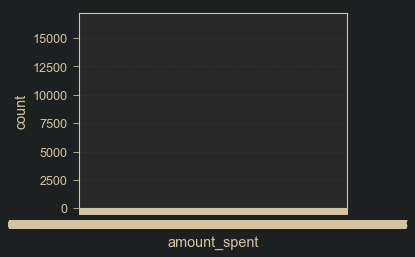

In [46]:
sns.countplot(x=label_AS, data=train_label)

In [57]:
# train_activity['quest_exp'].corr(train_activity['party_exp'])
# train_label['amount_spent'].corr(train_label['survival_time']) # -0.1 음의 상관관계
train_pledge['server'].corr(train_label['survival_time'])

TypeError: unsupported operand type(s) for /: 'str' and 'int'